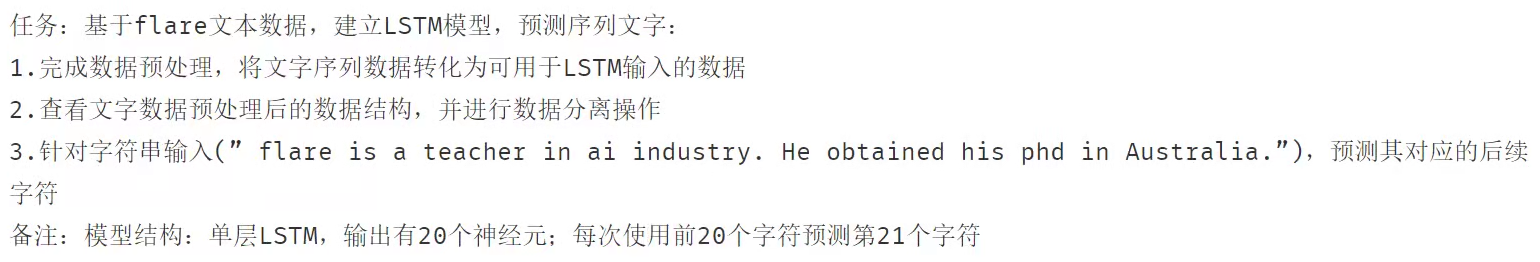

### 加载数据

In [1]:
import pandas as pd
import numpy as np

data = open('D:/project/dataset/zgpa/flare').read()
data = data.replace('\n', '').replace('\r', '')
# print(data)

### 字符去重处理

In [2]:
letters = list(set(data))
print(letters)

num_letters = len(letters)
print(num_letters)

['J', 't', 'V', 'D', '.', '2', 'w', 'e', '9', 'm', 'h', 'y', 'O', 'l', 'f', '-', 'd', 'v', 'S', ' ', 'u', 'p', 'n', 'H', ',', 'i', 'a', 'o', 'T', 'I', 'k', 'U', 'b', 's', 'B', '1', 'z', 'c', '4', 'r', 'C']
41


### 建立字典

In [3]:
int_to_char = {a:b for a,b in enumerate(letters)}
print(int_to_char)
print()
char_to_int = {b:a for a,b in enumerate(letters)}
print(char_to_int)

{0: 'J', 1: 't', 2: 'V', 3: 'D', 4: '.', 5: '2', 6: 'w', 7: 'e', 8: '9', 9: 'm', 10: 'h', 11: 'y', 12: 'O', 13: 'l', 14: 'f', 15: '-', 16: 'd', 17: 'v', 18: 'S', 19: ' ', 20: 'u', 21: 'p', 22: 'n', 23: 'H', 24: ',', 25: 'i', 26: 'a', 27: 'o', 28: 'T', 29: 'I', 30: 'k', 31: 'U', 32: 'b', 33: 's', 34: 'B', 35: '1', 36: 'z', 37: 'c', 38: '4', 39: 'r', 40: 'C'}

{'J': 0, 't': 1, 'V': 2, 'D': 3, '.': 4, '2': 5, 'w': 6, 'e': 7, '9': 8, 'm': 9, 'h': 10, 'y': 11, 'O': 12, 'l': 13, 'f': 14, '-': 15, 'd': 16, 'v': 17, 'S': 18, ' ': 19, 'u': 20, 'p': 21, 'n': 22, 'H': 23, ',': 24, 'i': 25, 'a': 26, 'o': 27, 'T': 28, 'I': 29, 'k': 30, 'U': 31, 'b': 32, 's': 33, 'B': 34, '1': 35, 'z': 36, 'c': 37, '4': 38, 'r': 39, 'C': 40}


In [4]:
time_step =20

### 字符串批量处理

In [5]:
import numpy as np
from keras.utils import to_categorical

# 滑动窗口提取数据
def extract_data(data, slide):
    x = []
    y = []
    
    for i in range(len(data) - slide):
        x.append([a for a in data[i:i+slide]])
        y.append([a for a in data[i+slide]])
        
    return x, y

# 字符到数字的批量转化
def char_to_int_data(x, y, char_to_int):
    x_to_int = []
    y_to_int = []
    
    for i in range(len(x)):
        x_to_int.append([char_to_int[char] for char in x[i]])
        y_to_int.append([char_to_int[char] for char in y[i]])
        
    return x_to_int, y_to_int

# 实现输入字符文章的批量处理，输入整个字符，滑动窗口大小，转化字典
def data_preprocession(data, slide, num_letters, char_to_int):
    char_data = extract_data(data, slide)
    int_data = char_to_int_data(char_data[0], char_data[1], char_to_int)
    input_data = int_data[0]
    output_data = list(np.array(int_data[1]).flatten())
    input_reshaped = np.array(input_data).reshape(len(input_data), slide)
    new = np.random.randint(
        0, 10, size=[input_reshaped.shape[0], input_reshaped.shape[1], num_letters])
    
    for i in range(input_reshaped.shape[0]):
        for j in range(input_reshaped.shape[1]):
            new[i,j,:] = to_categorical(input_reshaped[i,j], num_classes=num_letters)
            
    return new, output_data

### 提取x和y

In [6]:
%%time
X, y = data_preprocession(data, time_step, num_letters, char_to_int)

Wall time: 1min 6s


In [7]:
print(X[0][0])
print(X.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0]
(419884, 20, 41)


In [8]:
print(len(y))

419884


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
print(X_train.shape, len(y_train))

(377895, 20, 41) 377895


In [10]:
y_train_category = to_categorical(y_train, num_letters)
print(y_train_category[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


### 建立模型

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(
    LSTM(units=time_step, input_shape=(X_train.shape[1], X_train.shape[2]), activation="relu"))
model.add(Dense(units=num_letters, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                4960      
_________________________________________________________________
dense (Dense)                (None, 41)                861       
Total params: 5,821
Trainable params: 5,821
Non-trainable params: 0
_________________________________________________________________


### 训练数据

In [12]:
%%time
model.fit(X_train, y_train_category, batch_size=10000, epochs=15)

Epoch 1/15
38/38 [==============================] - 7s 167ms/step - loss: 3.6761 - accuracy: 0.0533
Epoch 2/15
38/38 [==============================] - 7s 180ms/step - loss: 3.1787 - accuracy: 0.1728
Epoch 3/15
38/38 [==============================] - 7s 174ms/step - loss: 2.9788 - accuracy: 0.1716
Epoch 4/15
38/38 [==============================] - 6s 167ms/step - loss: 2.8090 - accuracy: 0.2099
Epoch 5/15
38/38 [==============================] - 6s 163ms/step - loss: 2.3010 - accuracy: 0.3812
Epoch 6/15
38/38 [==============================] - 6s 156ms/step - loss: 1.6678 - accuracy: 0.5444
Epoch 7/15
38/38 [==============================] - 6s 158ms/step - loss: 1.2204 - accuracy: 0.6634
Epoch 8/15
38/38 [==============================] - 6s 152ms/step - loss: 0.9452 - accuracy: 0.7281
Epoch 9/15
38/38 [==============================] - 6s 151ms/step - loss: 0.7014 - accuracy: 0.8144
Epoch 10/15
38/38 [==============================] - 6s 148ms/step - loss: 0.9306 - accuracy: 0.7140

In [13]:
y_train_predict = model.predict_classes(X_train)
print(y_train_predict)

D:\software\anaconda\envs\tf_dl\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[39 10  4 ... 39  1 19]


In [14]:
y_train_predict_char = [int_to_char[i] for i in y_train_predict]
print(y_train_predict_char[:100])

['r', 'h', '.', 't', 'm', ',', 'd', 't', 'm', 'm', 'a', 'l', 'o', ' ', 'a', ',', 'e', 't', 'o', 'h', 's', 'a', 'i', 'O', 'b', ' ', 'c', 'i', 'w', 's', ' ', 'l', 't', 'l', 'c', 'e', 'i', 'I', 't', ' ', 'p', '1', 'a', 'e', 'e', 'i', 't', 'f', 'a', '-', 'e', ' ', 't', 'o', '2', 'o', 't', 'o', 'o', 'i', 'e', 'w', 'y', 'w', 'r', 'a', 'a', ' ', '1', 'n', 'e', 'n', 'o', ' ', ' ', 'i', 'n', ' ', ' ', '4', 'h', 'e', 'u', '1', 's', 's', ' ', 'w', 't', 'h', '1', 'o', ' ', 's', 's', 'o', ' ', 'o', 'c', 'a']


In [15]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_train_predict)
print(accuracy_train)

0.9714047552891676


In [16]:
y_test_predict = model.predict_classes(X_test)
accuracy_test = accuracy_score(y_test, y_test_predict)
print(accuracy_test)

D:\software\anaconda\envs\tf_dl\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9692776679606564


In [17]:
print(y_test_predict[:15])
print(y_test[:15])

[27 19 19 37  6 25 19 19  1  7 40 29 25 13 19]
[27, 19, 19, 37, 1, 25, 19, 19, 6, 7, 40, 29, 25, 13, 19]


In [18]:
new_letters = 'The United States continues to lead the world with more than 4 million cases of COVID-19'
X_new, y_new = data_preprocession(new_letters, time_step, num_letters, char_to_int)
y_new_predict = model.predict_classes(X_new)
print(y_new_predict)

[22  1 25 22 20  7 33 19  1 27 19 13  7 26 19 19  6 10 26 19  1 27 39 13
 16 19  6 25  1 10 19  9 27 39  7 19  1 10 26 22 19 38 19  9 25 13 13 25
 27 22 19 37 26 33  7 33 19 27 14 19 40 12  2 29  3 15 35  8]


D:\software\anaconda\envs\tf_dl\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [19]:
y_new_predict_char = [int_to_char[i] for i in y_new_predict]
print(y_new_predict_char)

['n', 't', 'i', 'n', 'u', 'e', 's', ' ', 't', 'o', ' ', 'l', 'e', 'a', ' ', ' ', 'w', 'h', 'a', ' ', 't', 'o', 'r', 'l', 'd', ' ', 'w', 'i', 't', 'h', ' ', 'm', 'o', 'r', 'e', ' ', 't', 'h', 'a', 'n', ' ', '4', ' ', 'm', 'i', 'l', 'l', 'i', 'o', 'n', ' ', 'c', 'a', 's', 'e', 's', ' ', 'o', 'f', ' ', 'C', 'O', 'V', 'I', 'D', '-', '1', '9']
